In [1]:
pip install wget

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=ea2f1c6c61d61c79d248631c734c763d34e1d5fc5b56aaa91443b4b02886422f
  Stored in directory: /home/tione/.cache/pip/wheels/c5/7d/57/a14ab81e83a58c3ccf630b021656bf453e6182666d5235f035
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


下载数据

In [6]:
import wget,tarfile
traindata = wget.download("https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/train_preliminary.zip")
testdata = wget.download("https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/test.zip")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

解压数据

In [2]:
zipfile.ZipFile('train_preliminary.zip').extractall('./data')
zipfile.ZipFile('test.zip').extractall('./data')

查看数据

In [2]:
train_path = "data/train_preliminary/"
test_path = "data/test/"

In [3]:
data_train_ad = pd.read_csv(train_path + "ad.csv")
data_train_click_log = pd.read_csv(train_path + "click_log.csv")
data_train_user = pd.read_csv(train_path + "user.csv")

data_test_ad = pd.read_csv(test_path + "ad.csv")
data_test_click_log = pd.read_csv(test_path + "click_log.csv")

In [4]:
print(data_train_ad.shape,data_train_click_log.shape,data_train_user.shape)

(2481135, 6) (30082771, 4) (900000, 3)


In [5]:
print(data_test_ad.shape,data_test_click_log.shape)

(2618159, 6) (33585512, 4)


统计总样本数，用户的人数、范围，和广告id的数量

In [8]:
len(data_train_click_log['user_id'].unique()),min(data_train_click_log['user_id']),max(data_train_click_log['user_id'])
len(data_train_click_log['creative_id'].unique()),min(data_train_click_log['creative_id']),max(data_train_click_log['creative_id'])

(2481135, 1, 4445718)

广告中的产品类别

In [10]:
len(data_train_ad['product_category'].unique()),min(data_train_ad['product_category']),max(data_train_ad['product_category'])

(18, 1, 18)

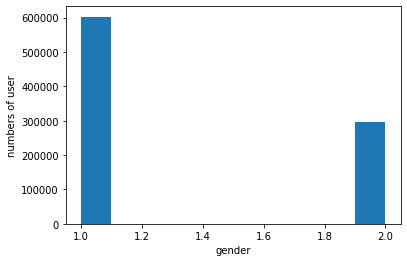

In [13]:
plt.hist(x=data_train_user['gender'])
plt.xlabel('gender')
plt.ylabel('numbers of user')
plt.show() 

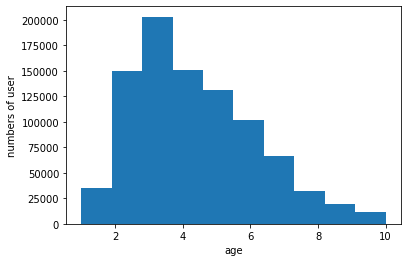

In [14]:
plt.hist(x=data_train_user['age'])
plt.xlabel('age')
plt.ylabel('numbers of user')
plt.show()

In [17]:
df_tmp = pd.DataFrame(data_train_click_log.groupby(['user_id','creative_id'])['click_times'].sum()).reset_index()
feat_name = '_'.join(['user_id','creative_id']) + "_" + 'click_times' + "_" + 'sum'
df_tmp.columns = ['user_id','creative_id'] + [feat_name]
tmp = data_train_click_log.merge(df_tmp, how='left', on=['user_id','creative_id'])
tmp['click_times'] = tmp['click_times']/tmp['user_id_creative_id_sum']

,user_id,creative_id,user_id_creative_id_sum
0,1,71691,1
1,1,90171,1
2,1,122032,1
3,1,209778,1
4,1,821396,1


In [23]:
tmp

,time,user_id,creative_id,click_times,user_id_creative_id_sum
0,9,30920,567330,1.00,1
1,65,30920,3072255,1.00,1
2,56,30920,2361327,1.00,1
3,6,309204,325532,1.00,1
4,59,309204,2746730,1.00,1
...,...,...,...,...,...
30082766,6,30920,228129,1.00,1
30082767,57,30920,2361397,0.25,4
30082768,26,30920,629802,0.50,2
30082769,86,30920,2713031,1.00,1


In [6]:
data_train_ad.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,4,4,\N,5,108,202
2,7,7,\N,5,148,297
3,8,8,\N,5,713,213
4,9,9,\N,5,695,213


In [11]:
print(data_train_ad['ad_id'].nunique())
print(data_train_ad['product_id'].nunique())
print(data_train_ad['product_category'].nunique())
print(data_train_ad['advertiser_id'].nunique())
print(data_train_ad['industry'].nunique())

2264190
33273
18
52090
326


In [13]:
import pandas as pd
import numpy as np
id_seq_path = './id_seq_path/'
feat = ['creative_id','ad_id','advertiser_id']

In [14]:
def avgwin(feat):
    print(id_seq_path+feat+'_seq.csv')
    df_id_seq = pd.read_csv(id_seq_path+feat+'_seq.csv')
    df_id_seq[feat+'_seq'] = df_id_seq[feat+'_seq'].apply(lambda x: eval(x))
    maxlen = []
    for i, v in df_id_seq[feat+'_seq'].items():
        maxlen.append(len(v))
    print(max(maxlen))
    
    return np.mean(maxlen)

In [15]:
for f in feat:
    print(f+str(avgwin(f)))

./id_seq_path/creative_id_seq.csv


KeyboardInterrupt: 